Признаки: ['sepal length (cm)', 'sepal width (cm)']
Классы: ['setosa' 'versicolor' 'virginica']
Accuracy LDA на тесте: 0.756


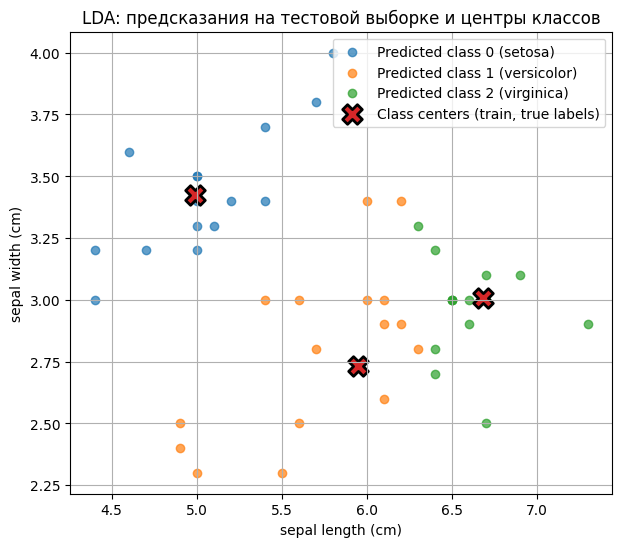

Silhouette scores по k от 2 до 9:
k = 2: silhouette = 0.463
k = 3: silhouette = 0.445
k = 4: silhouette = 0.425
k = 5: silhouette = 0.410
k = 6: silhouette = 0.397
k = 7: silhouette = 0.401
k = 8: silhouette = 0.388
k = 9: silhouette = 0.389

Оптимальное число кластеров по силуэту: k = 2


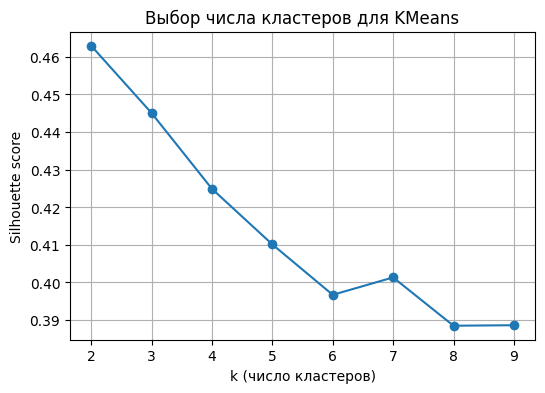

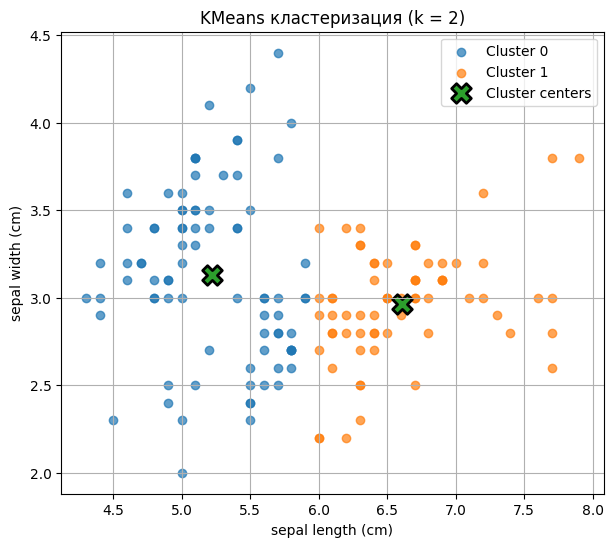

In [1]:
# -------------------------------
# Импорт нужных библиотек
# -------------------------------
 
# numpy — библиотека для работы с массивами и математикой
import numpy as np
 
# matplotlib — библиотека для рисования графиков
import matplotlib.pyplot as plt
 
# load_iris — функция, которая загружает набор данных "iris" (ирисы — цветы)
from sklearn.datasets import load_iris
 
# train_test_split — функция, чтобы разделить данные на train (обучение) и test (проверка)
from sklearn.model_selection import train_test_split
 
# LinearDiscriminantAnalysis — класс для модели LDA (линейный дискриминантный анализ)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
# accuracy_score — функция для вычисления качества классификации (accuracy)
from sklearn.metrics import accuracy_score
 
# KMeans — алгоритм кластеризации k-средних
from sklearn.cluster import KMeans
 
# silhouette_score — метрика для оценки качества кластеризации
from sklearn.metrics import silhouette_score
 
 
# =========================
# 1. Загрузка данных iris
# =========================
 
# Загружаем встроенный датасет iris
iris = load_iris()
 
# В iris.data хранятся все числовые признаки (4 штуки).
# [:, :2] означает: взять все строки и первые два столбца.
# В данном датасете:
#   0-й столбец — sepal length (длина чашелистика),
#   1-й столбец — sepal width  (ширина чашелистика).
X = iris.data[:, :2]
 
# Целевая переменная y — это номера классов (0, 1, 2),
# соответствующие видам ирисов (setosa, versicolor, virginica).
y = iris.target
 
# Названия признаков (берём только первые два)
feature_names = iris.feature_names[:2]
 
# Названия классов (строки: 'setosa', 'versicolor', 'virginica')
target_names = iris.target_names
 
print("Признаки:", feature_names)
print("Классы:", target_names)
 
 
# =========================
# 2. Разделение на train/test
# =========================
 
# train_test_split делит X и y на две части:
#  - обучающую (train) — на ней модель учится
#  - тестовую   (test) — на ней мы проверяем модель
#
# test_size=0.3 означает: 30% для теста, 70% для обучения.
# random_state=42 — "зерно" случайности, чтобы результат был воспроизводимым.
# stratify=y — чтобы в train и test было примерно одинаковое соотношение классов.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
 
 
# =========================
# 3. Обучение модели LDA
# =========================
 
# Создаём объект модели LDA
lda = LinearDiscriminantAnalysis()
 
# Обучаем модель на обучающей выборке (X_train, y_train)
lda.fit(X_train, y_train)
 
# Делаем предсказания классов для тестовой выборки X_test
y_pred = lda.predict(X_test)
 
# Считаем метрику accuracy (доля правильных ответов)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy LDA на тесте: {acc:.3f}")
 
 
# =========================
# 4. Визуализация предсказаний
#    и центров классов
# =========================
 
# Сейчас мы хотим нарисовать:
#  - точки тестовой выборки, раскрашенные по ПРЕДСКАЗАННЫМ классам
#  - центры классов, посчитанные по TRAIN-выборке и ИСТИННЫМ меткам
 
# Сначала найдём центры классов (по train-части, по y_train)
class_centers = []  # сюда будем складывать средние значения по каждому классу
 
# np.unique(y_train) возвращает список уникальных классов, например [0, 1, 2]
for cls in np.unique(y_train):
    # Маска: выбираем только те объекты X_train, у которых класс == cls
    class_points = X_train[y_train == cls]
    # Считаем среднее значение признаков (по строкам)
    center = class_points.mean(axis=0)
    # Добавляем в список
    class_centers.append(center)
 
# Превращаем список в numpy-массив формы (число_классов, 2)
class_centers = np.array(class_centers)
 
# Создаём новое окно для графика
plt.figure(figsize=(7, 6))
 
# Рисуем точки тестовой выборки.
# Цвет зависит от предсказанного класса y_pred.
for cls in np.unique(y_pred):
    # Маска для предсказанного класса cls
    mask = (y_pred == cls)
    # Рисуем только те точки, где mask == True
    plt.scatter(
        X_test[mask, 0],   # координаты по оси X (sepal length)
        X_test[mask, 1],   # координаты по оси Y (sepal width)
        label=f"Predicted class {cls} ({target_names[cls]})",  # подпись в легенде
        alpha=0.7          # прозрачность (чтобы точки не перекрывали друг друга полностью)
    )
 
# Теперь рисуем центры классов
plt.scatter(
    class_centers[:, 0],  # X-координаты центров
    class_centers[:, 1],  # Y-координаты центров
    marker="X",           # маркер в виде крестика X
    s=200,                # размер маркера
    edgecolor="black",    # чёрная рамка вокруг маркера
    linewidths=2,         # толщина рамки
    label="Class centers (train, true labels)"  # подпись в легенде
)
 
# Подписываем оси графика
plt.xlabel(feature_names[0])  # sepal length
plt.ylabel(feature_names[1])  # sepal width
 
# Заголовок графика
plt.title("LDA: предсказания на тестовой выборке и центры классов")
 
# Показываем легенду (подписи цветов/маркеров)
plt.legend()
 
# Включаем сетку для удобства чтения
plt.grid(True)
 
# Показываем график
plt.show()
 
 
# =========================
# 5. KMeans-кластеризация
#    (работаем только с признаками, без y)
# =========================
 
# Для кластеризации нам не нужна целевая переменная y.
# Берём все объекты X_clust (те же 2 признака).
X_clust = X
 
# --- Подбор оптимального числа кластеров ---
# Мы будем перебирать k (число кластеров) от 2 до 9
# и для каждого k считать silhouette_score.
sil_scores = []            # сюда будем записывать значения силуэт-метрики
K_range = range(2, 10)     # перебираем k = 2, 3, ..., 9
 
for k in K_range:
    # Создаём модель KMeans с k кластерами
    # random_state — чтобы результат был повторяемым
    # n_init — сколько раз алгоритм запустится с разными начальными центрами
    kmeans_tmp = KMeans(n_clusters=k, random_state=42, n_init=10)
 
    # Обучаем модель и сразу получаем номера кластеров для всех объектов X_clust
    labels_tmp = kmeans_tmp.fit_predict(X_clust)
 
    # Считаем силуэт-метрику для данного разбиения на кластеры
    sil = silhouette_score(X_clust, labels_tmp)
 
    # Добавляем в список
    sil_scores.append(sil)
 
# Теперь найдём, при каком k силуэт-метрика максимальна
best_index = int(np.argmax(sil_scores))  # индекс максимального значения
best_k = list(K_range)[best_index]       # само k, соответствующее этому индексу
 
# Для информации выведем силуэт-метрики для разных k
print("Silhouette scores по k от 2 до 9:")
for k, score in zip(K_range, sil_scores):
    print(f"k = {k}: silhouette = {score:.3f}")
 
print(f"\nОптимальное число кластеров по силуэту: k = {best_k}")
 
# Нарисуем график зависимости silhouette_score от k
plt.figure(figsize=(6, 4))
plt.plot(list(K_range), sil_scores, marker="o")
plt.xticks(list(K_range))  # ставим отметки по оси X на значения k
plt.xlabel("k (число кластеров)")
plt.ylabel("Silhouette score")
plt.title("Выбор числа кластеров для KMeans")
plt.grid(True)
plt.show()
 
# --- Финальная модель KMeans с оптимальным k ---
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
 
# Обучаем KMeans и получаем метки кластеров для всех объектов X_clust
cluster_labels = kmeans.fit_predict(X_clust)
 
# Координаты центров кластеров
cluster_centers = kmeans.cluster_centers_
 
 
# =========================
# 6. Визуализация кластеризации
# =========================
 
plt.figure(figsize=(7, 6))
 
# Рисуем точки, раскрашенные по найденным кластерам
for cl in np.unique(cluster_labels):
    # Маска для объектов из кластера cl
    mask = (cluster_labels == cl)
 
    plt.scatter(
        X_clust[mask, 0],    # X-координата (sepal length)
        X_clust[mask, 1],    # Y-координата (sepal width)
        label=f"Cluster {cl}",
        alpha=0.7
    )
 
# Рисуем центры кластеров
plt.scatter(
    cluster_centers[:, 0],  # X-координаты центров кластеров
    cluster_centers[:, 1],  # Y-координаты центров кластеров
    marker="X",             # форма маркера
    s=200,                  # размер
    edgecolor="black",      # цвет рамки
    linewidths=2,           # толщина рамки
    label="Cluster centers"
)
 
# Подписи осей
plt.xlabel(feature_names[0])  # sepal length
plt.ylabel(feature_names[1])  # sepal width
 
# Заголовок
plt.title(f"KMeans кластеризация (k = {best_k})")
 
# Легенда
plt.legend()
 
# Сетка
plt.grid(True)
 
# Показ графика
plt.show()